In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [45]:
file_location = "../data/cleaned/cleaned_data.csv"
df = pd.read_csv(file_location)
df.head()

,Unnamed: 0,id,gen,sp,ssp,group,en,rec,cnt,loc,...,rmk,bird-seen,animal-seen,playback-used,temperature,regnr,auto,dvc,mic,smp
0,24,883631,Branta,canadensis,NaN,birds,Canada Goose,Théo Trees,France,Arrondissement de Lille (près de Villeneuve-d'...,...,NaN,yes,yes,no,NaN,NaN,no,Zoom H5,sennheiser MKE 600,44100
1,25,847144,Branta,canadensis,NaN,birds,Canada Goose,Andrew Harrop,United Kingdom,"Stoke Dry, Rutland, England",...,Calls (and some wingbeats) from flock leaving ...,yes,yes,no,NaN,NaN,no,NaN,NaN,44100
2,26,806434,Branta,canadensis,NaN,birds,Canada Goose,Francesco Barberini,Italy,"Capodimonte, Province of Viterbo, Lazio",...,Introduced species.,yes,yes,no,NaN,NaN,no,NaN,NaN,44100
3,27,789046,Branta,canadensis,NaN,birds,Canada Goose,Sławomir Karpicki-Ignatowski,Poland,"Poznań, Poznań, Wielkopolskie",...,NaN,yes,yes,no,NaN,NaN,no,NaN,NaN,44100
4,28,785498,Branta,canadensis,NaN,birds,Canada Goose,Bernard Collet,Belgium,Arrondissement de Tournai-Mouscron (near Brun...,...,NaN,yes,yes,no,NaN,NaN,no,NaN,NaN,44100


# Stratified splitting with validation

We use stratified splitting to improve generalization by ensure class distributions are similar across train, test an validation sets.

In [49]:
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['en'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['en'], random_state=42)

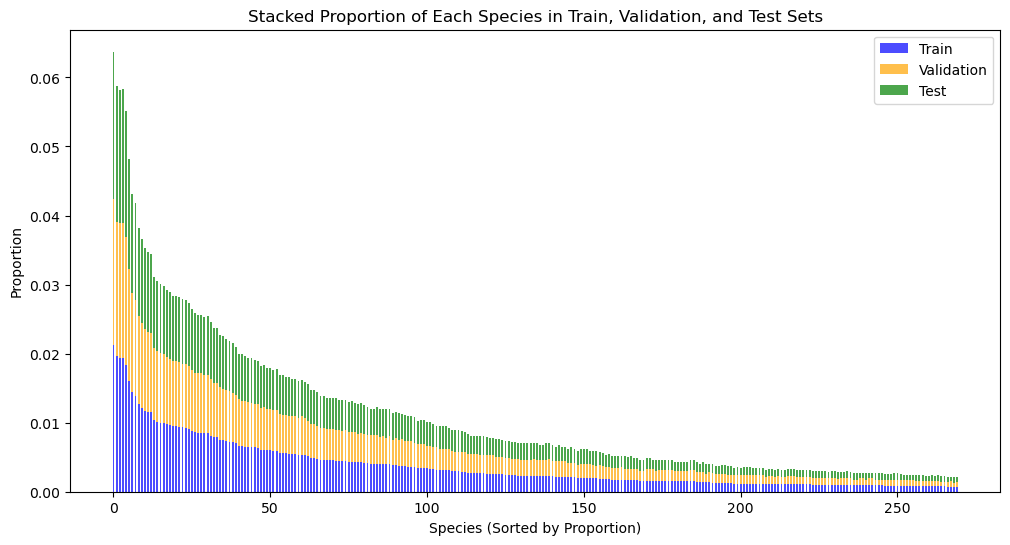

In [51]:
train_props = train_df['en'].value_counts(normalize=True).sort_index()
val_props = val_df['en'].value_counts(normalize=True).sort_index()
test_props = test_df['en'].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    'Train': train_props,
    'Validation': val_props,
    'Test': test_props
}).fillna(0)  

distribution_df = distribution_df.sort_values(by='Train', ascending=False)

species_indices = np.arange(len(distribution_df)) 
plt.figure(figsize=(12, 6))

plt.bar(species_indices, distribution_df['Train'], width=0.6, label='Train', color='blue', alpha=0.7)
plt.bar(species_indices, distribution_df['Validation'], width=0.6, label='Validation', bottom=distribution_df['Train'], color='orange', alpha=0.7)
plt.bar(species_indices, distribution_df['Test'], width=0.6, label='Test', bottom=distribution_df['Train'] + distribution_df['Validation'], color='green', alpha=0.7)

plt.xlabel('Species (Sorted by Proportion)')
plt.ylabel('Proportion')
plt.title('Stacked Proportion of Each Species in Train, Validation, and Test Sets')
plt.legend()

plt.show()

In [52]:
train_df.to_csv('../data/cleaned/70_15_15_cleaned_train.csv')
test_df.to_csv('../data/cleaned/70_15_15_cleaned_test.csv')
val_df.to_csv('../data/cleaned/70_15_15_cleaned_val.csv')

# Stratified Splitting for K-Fold without Validation

For model performance analysis reasons, we also create splits with a larger train set and without validation set where we intend to use K-Fold Cross Validation.

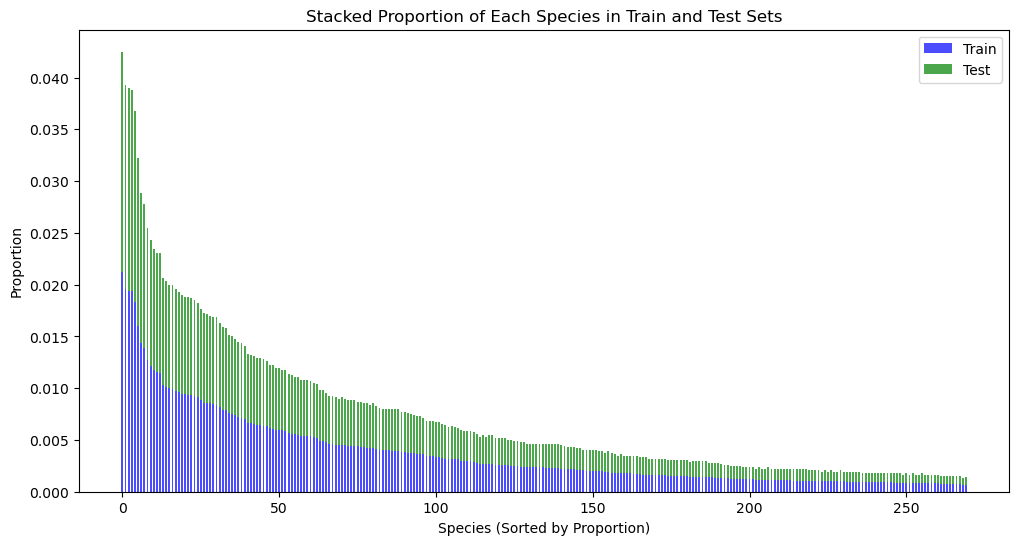

In [57]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['en'], random_state=42)

train_props = train_df['en'].value_counts(normalize=True).sort_index()

test_props = test_df['en'].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    'Train': train_props,
    'Test': test_props
}).fillna(0)  

distribution_df = distribution_df.sort_values(by='Train', ascending=False)

species_indices = np.arange(len(distribution_df)) 
plt.figure(figsize=(12, 6))

plt.bar(species_indices, distribution_df['Train'], width=0.6, label='Train', color='blue', alpha=0.7)
plt.bar(species_indices, distribution_df['Test'], width=0.6, label='Test', bottom=distribution_df['Train'] , color='green', alpha=0.7)

plt.xlabel('Species (Sorted by Proportion)')
plt.ylabel('Proportion')
plt.title('Stacked Proportion of Each Species in Train and Test Sets')
plt.legend()

plt.show()

In [58]:
train_df.to_csv('../data/cleaned/80_20_cleaned_train.csv')
test_df.to_csv('../data/cleaned/80_20_cleaned_test.csv')